<a href="https://colab.research.google.com/github/kawin-pixel/real_estate_th/blob/main/Real_estate_TH_200k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation

In [1]:
library(dbplyr)
library(ggplot2)
library(tidyverse)

data <- read.csv("/content/ddproperty_2022-04-19.csv")

##source: https://www.kaggle.com/datasets/polartech/200k-homes-for-sale-in-thailand

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::ident()  masks dbplyr::ident()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::sql()    masks dbplyr::sql()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message in file(file, "rt"):
“cannot open file '/content/ddproperty_2022-04-19.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
summary(data)

 sub_property_type   agent_name         living_space     land_space_raw    
 Length:220557      Length:220557      Min.   :      1   Length:220557     
 Class :character   Class :character   1st Qu.:     35   Class :character  
 Mode  :character   Mode  :character   Median :     63   Mode  :character  
                                       Mean   :    393                     
                                       3rd Qu.:    150                     
                                       Max.   :6000000                     
                                       NA's   :32087                       
 price_per_unit       price_max         searched_field     bathroom_number 
 Length:220557      Min.   :0.000e+00   Length:220557      Min.   :  0.00  
 Class :character   1st Qu.:2.900e+06   Class :character   1st Qu.:  1.00  
 Mode  :character   Median :5.640e+06   Mode  :character   Median :  2.00  
                    Mean   :4.577e+07                      Mean   :  2.01  
            

In [ ]:
## calculate price to sqm for condo

data <- data %>% mutate(price_sqm_condo =
                          ifelse(data$property_type == "Condo", data$price / data$living_space,NA))

data$count <- 1

summary(data)
head(data)
unique(data$property_type)
unique(data$state)

 sub_property_type   agent_name         living_space     land_space_raw    
 Length:220557      Length:220557      Min.   :      1   Length:220557     
 Class :character   Class :character   1st Qu.:     35   Class :character  
 Mode  :character   Mode  :character   Median :     63   Mode  :character  
                                       Mean   :    393                     
                                       3rd Qu.:    150                     
                                       Max.   :6000000                     
                                       NA's   :32087                       
 price_per_unit       price_max         searched_field     bathroom_number 
 Length:220557      Min.   :0.000e+00   Length:220557      Min.   :  0.00  
 Class :character   1st Qu.:2.900e+06   Class :character   1st Qu.:  1.00  
 Mode  :character   Median :5.640e+06   Mode  :character   Median :  2.00  
                    Mean   :4.577e+07                      Mean   :  2.01  
            

,sub_property_type,agent_name,living_space,land_space_raw,price_per_unit,price_max,searched_field,bathroom_number,property_status,search_date,⋯,land_space_unit,short_description,property_type_searched,property_url,tenure,parking_number,listing_headline,agent_email,price_sqm_condo,count
,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<lgl>,⋯,<chr>,<lgl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<dbl>
1,For Sale,คุณโบว์ 095-405-8716,280,271.2 sqm,฿84623.8938 / sqm,22950000,TH1001_2_1.html,NA,ACT,NA,⋯,sqm,NA,For_Sale,https://www.ddproperty.com/en/property/bh-01075-ขาย-บ้านเดี่ยว-ติด-กระทรวงเกษตรและสหกรณ์-บ้านเดี่ยวซอยวัดปรินายก-บ้านเดี่ยว-ใกล้-mrt-สามยอด-for-sale-8812524,Freehold,NA,"BH_01075 ขาย บ้านเดี่ยว ติด กระทรวงเกษตรและสหกรณ์ บ้านเดี่ยวซอยวัดปรินายก, บ้านเดี่ยว ใกล้ MRT สามยอด",NA,NA,1
2,For Sale,Nakornthong Property,NA,328 sqm,฿48780.4878 / sqm,16000000,TH1001_2_1.html,NA,ACT,NA,⋯,sqm,NA,For_Sale,https://www.ddproperty.com/en/property/ที่ดินพร้อมบ้านไม้-ถนนประชาธิปไตย-for-sale-7212247,,NA,ที่ดินพร้อมบ้านไม้ ถนนประชาธิปไตย,NA,NA,1
3,For Sale,Nakornthong Property,NA,328 sqm,฿48780.4878 / sqm,16000000,TH1001_2_1.html,NA,ACT,NA,⋯,sqm,NA,For_Sale,https://www.ddproperty.com/en/property/ที่ดิน-พร้อมบ้านไม้เก่า-2-ชั้น-ทำเลใจกลางเมือง-ถนนราชดำเนิน-for-sale-2354921,Freehold,NA,ที่ดิน พร้อมบ้านไม้เก่า 2 ชั้น ทำเลใจกลางเมือง ถนนราชดำเนิน,NA,NA,1
4,For Sale,Pichai.So,35,,฿62857.1429 / sqm,2200000,TH1001_2_1.html,1,ACT,NA,⋯,,NA,For_Sale,https://www.ddproperty.com/en/property/ขายด่วน-condo-เทเวศร์-ซอย-เทเวศร์-1-ชั้น-7-พื้นที่-35ตรม-1ห้อง-studio-1ห้องน้ำ-แยกห้องครัว-for-sale-8133476,Freehold,NA,ขายด่วน! Condo เทเวศร์ ซอย เทเวศร์ 1 ชั้น 7 พื้นที่ 35ตรม. 1ห้อง Studio 1ห้องน้ำ แยกห้องครัว,NA,62857.14,1
5,For Sale,Uptown Assets,28,,฿53571.4286 / sqm,1500000,TH1001_2_1.html,1,ACT,NA,⋯,,NA,For_Sale,https://www.ddproperty.com/en/property/for-sale-lumpini-ville-ramkhamhang-26-ua-01786-for-sale-7532202,,NA,For Sale Lumpini Ville Ramkhamhang 26 | UA-01786,NA,53571.43,1
6,For Sale,Uptown Assets,37,,฿78378.3784 / sqm,2900000,TH1001_2_1.html,1,ACT,NA,⋯,,NA,For_Sale,https://www.ddproperty.com/en/property/for-rent-sell-esta-bliss-ramindra-building-a-6th-floor-unit-126-146-ua-01344-for-sale-7532492,,NA,FOR RENT & Sell Esta Bliss Ramindra Building A 6th Floor Unit 126/146 | UA-01344,NA,78378.38,1


[1] "Detached House" "Land"           "Condo"          "Apartment"     
[5] "Townhouse"

[1] "Bangkok"                  "Samut Prakan"            
 [3] "Nonthaburi"               "Pathum Thani"            
 [5] "Phra Nakhon Si Ayutthaya" "Ang Thong"               
 [7] "Lop Buri"                 "Sing Buri"               
 [9] "Chai Nat"                 "Saraburi"                
[11] "Chon Buri"                "Rayong"                  
[13] "Chanthaburi"              "Trat"                    
[15] "Chachoengsao"             "Prachin Buri"            
[17] "Nakhon Nayok"             "Sa Kaeo"                 
[19] "Nakhon Ratchasima"        "Buri Ram"                
[21] "Surin"                    "Si Sa Ket"               
[23] "Ubon Ratchathani"         "Yasothon"                
[25] "Chaiyaphum"               "Amnat Charoen"           
[27] "Nong Bua Lam Phu"         "Khon Kaen"               
[29] "Udon Thani"               "Loei"                    
[31] "Nong Khai"                "Maha Sarakham"           
[33] "Roi Et"                   "Kalasin"                 
[35] "Sakon Nakhon"             "Nakhon Phanom"           
[37] "Mukdahan"                 "Chiang Mai"              
[39] "Lamphun"                  "Lampang"                 
[41] "Uttaradit"                "Phrae"                   
[43] "Nan"                      "Phayao"                  
[45] "Chiang Rai"               "Mae Hong Son"            
[47] "Nakhon Sawan"             "Uthai Thani"             
[49] "Kamphaeng Phet"           "Tak"                     
[51] "Sukhothai"                "Phitsanulok"             
[53] "Phichit"                  "Phetchabun"              
[55] "Ratchaburi"               "Kanchanaburi"            
[57] "Suphan Buri"              "Nakhon Pathom"           
[59] "Samut Sakhon"             "Samut Songkhram"         
[61] "Phetchaburi"              "Prachuap Khiri Khan"     
[63] "Nakhon Si Thammarat"      "Krabi"                   
[65] "Phangnga"                 "Phuket"                  
[67] "Surat Thani"              "Ranong"                  
[69] "Chumphon"                 "Songkhla"                
[71] "Satun"                    "Trang"                   
[73] "Phatthalung"              "Pattani"                 
[75] "Yala"                     "Narathiwat"              
[77] "Bueng Kan"                "Pattaya"

#Condo analysis

## Condo price / sqm by district in BKK

Warning message:
“Removed 6532 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


95% 
290400

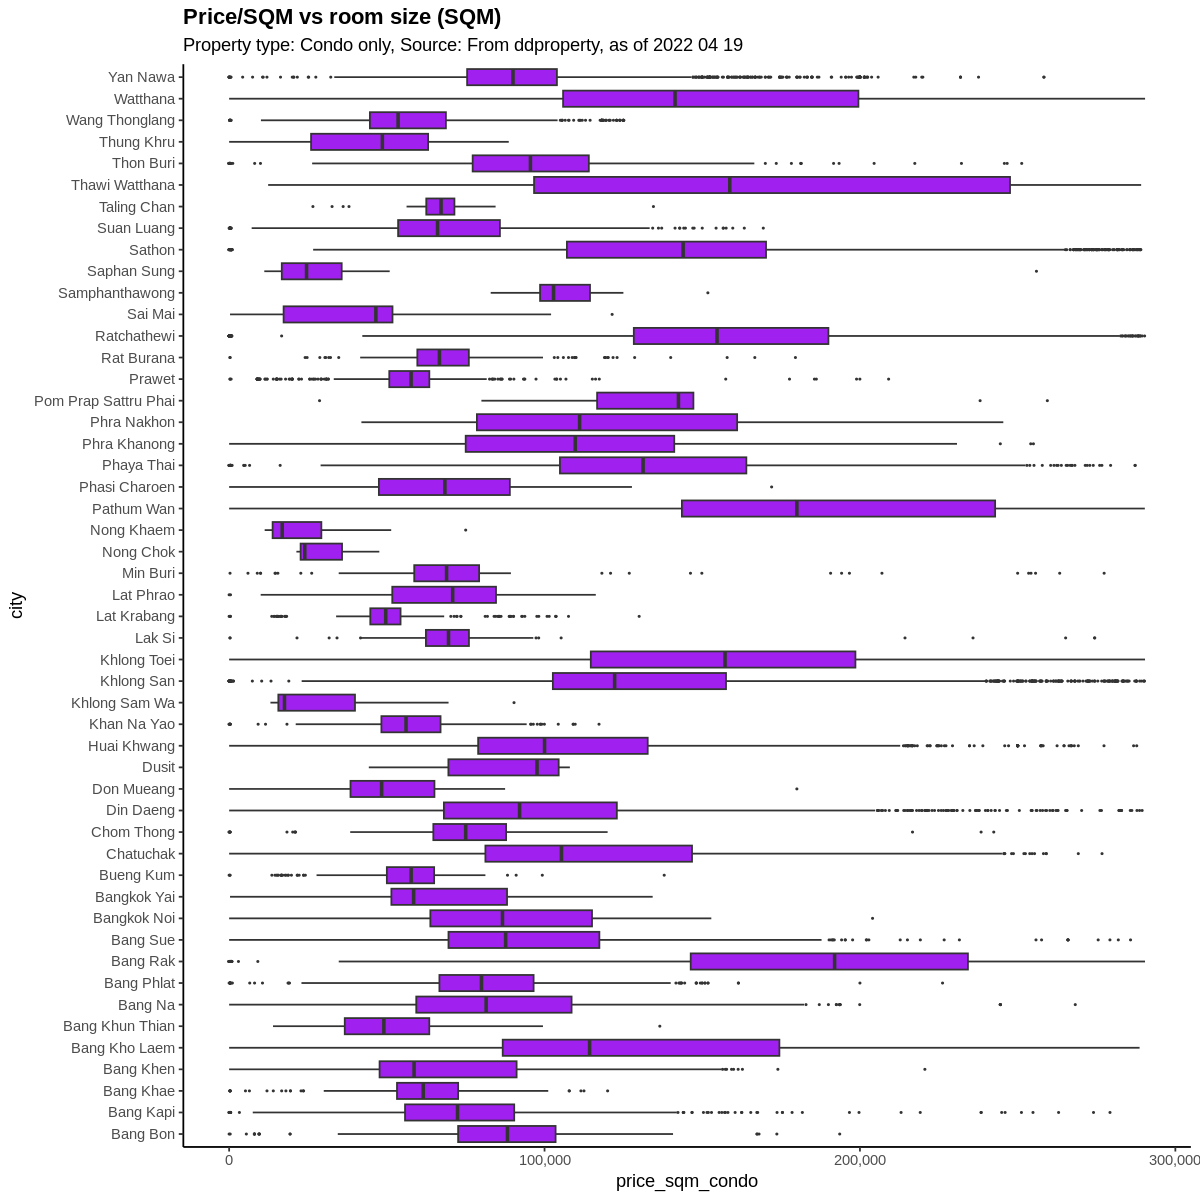

In [ ]:
#supply overview

##condo price / sqm by district in BKK
options(repr.plot.width=10, repr.plot.height=10, dpi = 600)

ggplot(subset(data, property_type == "Condo" & state == "Bangkok" ), mapping = aes(x = price_sqm_condo, y = city)) +
  geom_boxplot( fill = "purple", outlier.size = 0.2) +
  scale_x_continuous(limits = c(0,290400), ##price quantile 0.95 = 290,400
                     labels = scales::comma) +
  ## theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs(title = "Price/SQM vs room size (SQM)",
        subtitle = "Property type: Condo only, Source: From ddproperty, as of 2022 04 19 ")


quantile(data$price_sqm_condo, 0.95, na.rm = T)

## Condo price / sqm in BKK

Warning message:
“Removed 6816 rows containing missing values or values outside the scale range
(`geom_point()`).”


95% 
290400

95% 
475

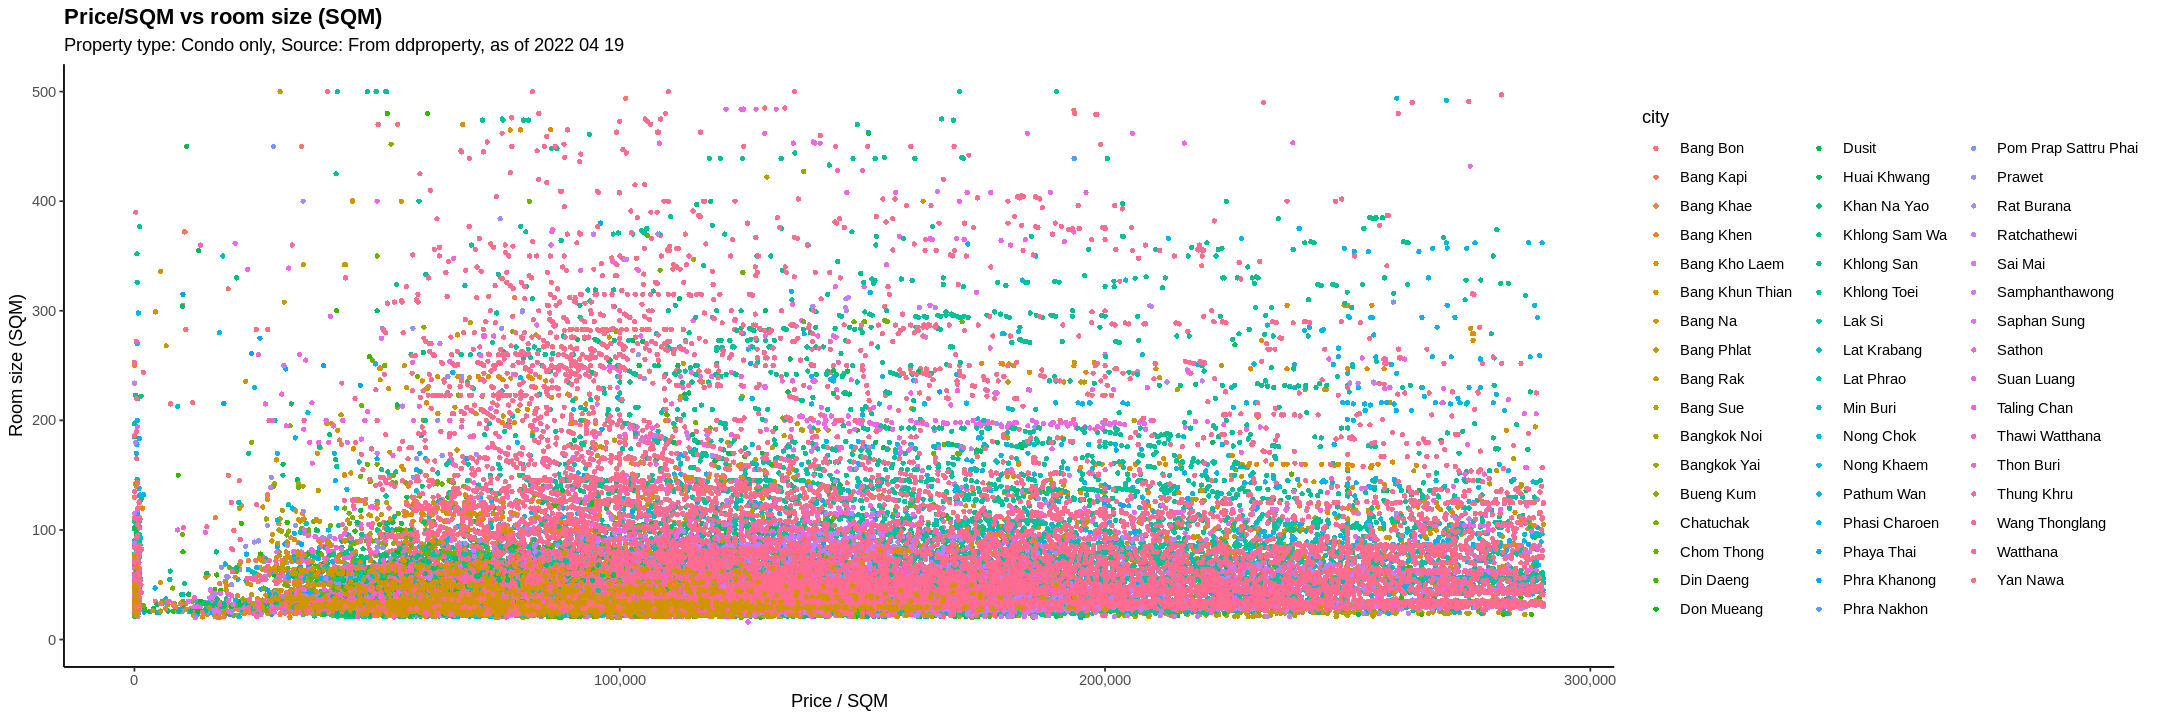

In [ ]:
options(repr.plot.width=18, repr.plot.height=6, dpi = 600)

##condo price / sqm in BKK
ggplot(subset(data, property_type == "Condo" & state == "Bangkok" ), mapping = aes(x = price_sqm_condo, y = living_space,
                                                                                   fill = city)) +
  geom_point(shape = 21,
              stroke = NA) +
  scale_x_continuous(limits = c(0,290400), ##price quantile 0.95 = 290,400
                     labels = scales::comma) +
  scale_y_continuous(limits = c(0,500), ##living space quantile 0.95 = 475
                     labels = scales::comma) +
  ## theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs( x = "Price / SQM",
        y = "Room size (SQM)",
        title = "Price/SQM vs room size (SQM)",
        subtitle = "Property type: Condo only, Source: From ddproperty, as of 2022 04 19 ")

quantile(data$price_sqm_condo, 0.95, na.rm = T)
quantile(data$living_space, 0.95, na.rm = T)

##Room size vs price breakdown by BKK district

Warning message:
“Removed 6816 rows containing missing values or values outside the scale range
(`geom_point()`).”


90% 
234042.6

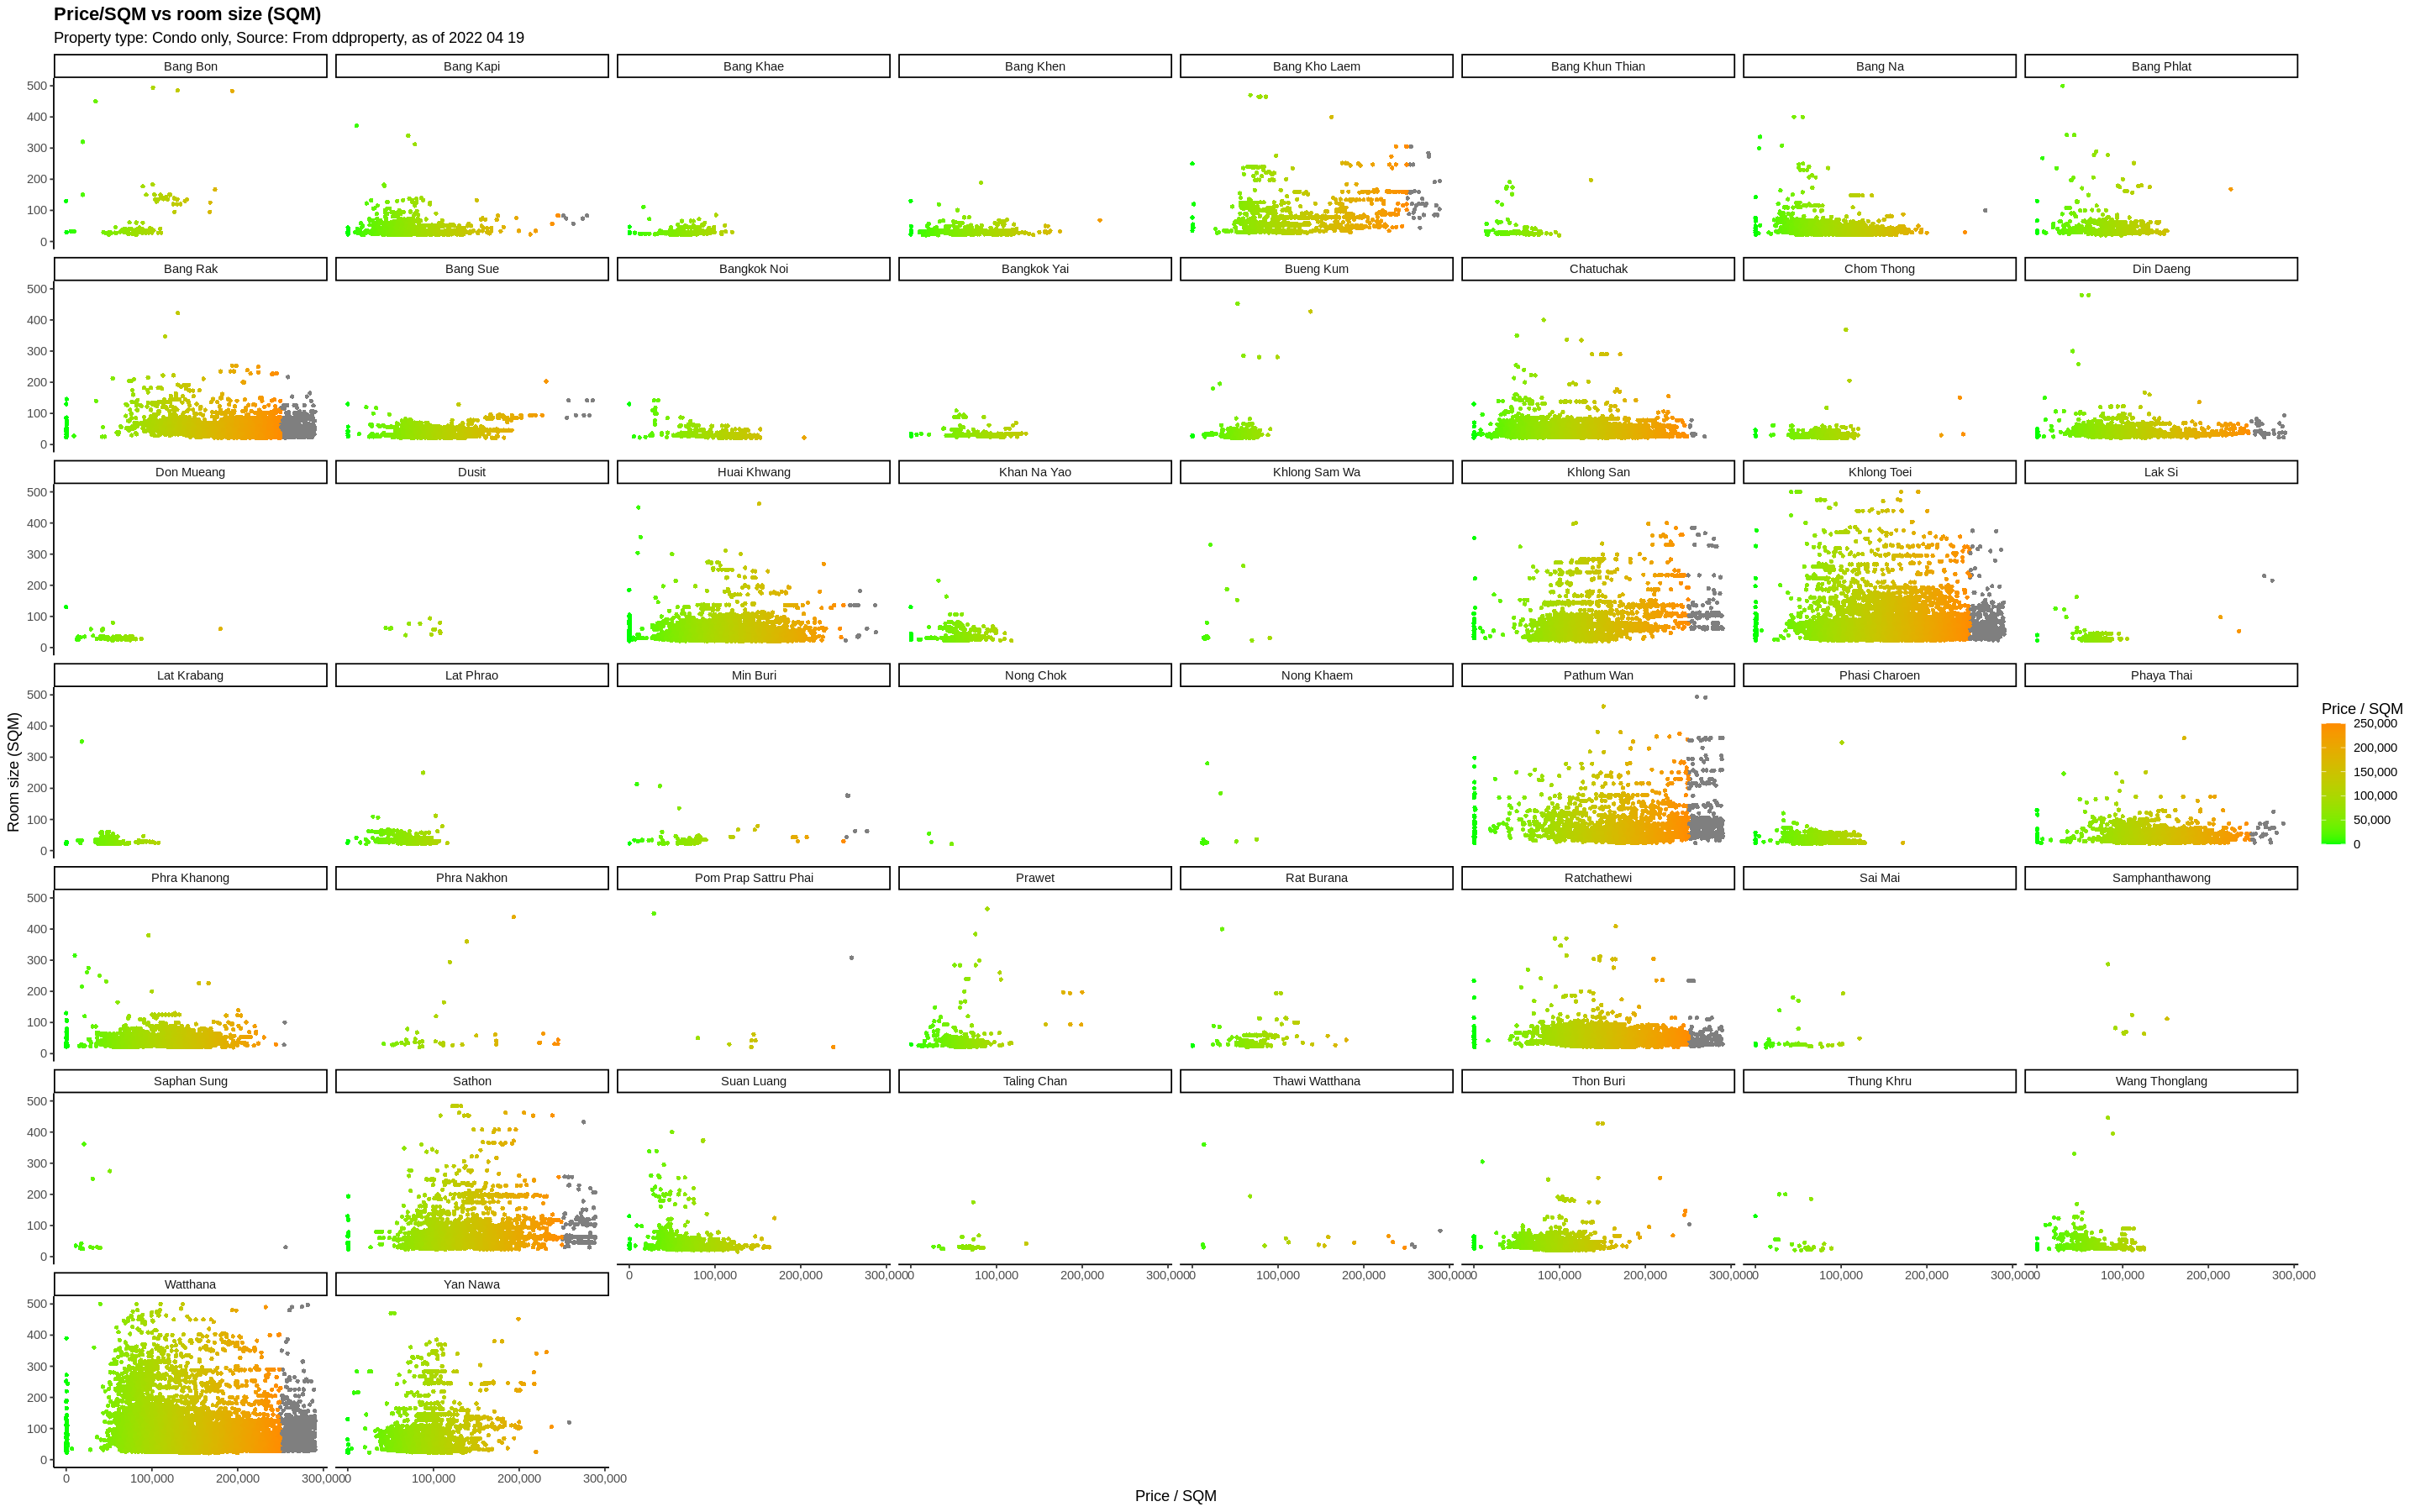

In [ ]:
options(repr.plot.width=24, repr.plot.height=15, dpi = 600)

##condo price / sqm in BKK
ggplot(subset(data, property_type == "Condo" & state == "Bangkok" ), mapping = aes(x = price_sqm_condo, y = living_space,
                                                                                   fill = price_sqm_condo)) +
  geom_point(shape = 21, stroke = NA) +
  scale_x_continuous(limits = c(0,290400), ##price quantile 0.95 = 290,400
                     labels = scales::comma) +
  scale_y_continuous(limits = c(0,500), ##living space quantile 0.95 = 475
                     labels = scales::comma) +
  scale_fill_gradient(high = "darkorange", low = "green",
                      limits = c(0,250000),
                      labels = scales::comma) +
  facet_wrap(~ city) +
  ## theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs( x = "Price / SQM",
        y = "Room size (SQM)",
        fill = "Price / SQM",
        title = "Price/SQM vs room size (SQM)",
        subtitle = "Property type: Condo only, Source: From ddproperty, as of 2022 04 19 ")
quantile(data$price_sqm_condo, 0.90, na.rm = T)

# All property types

Warning message:
“Removed 10278 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


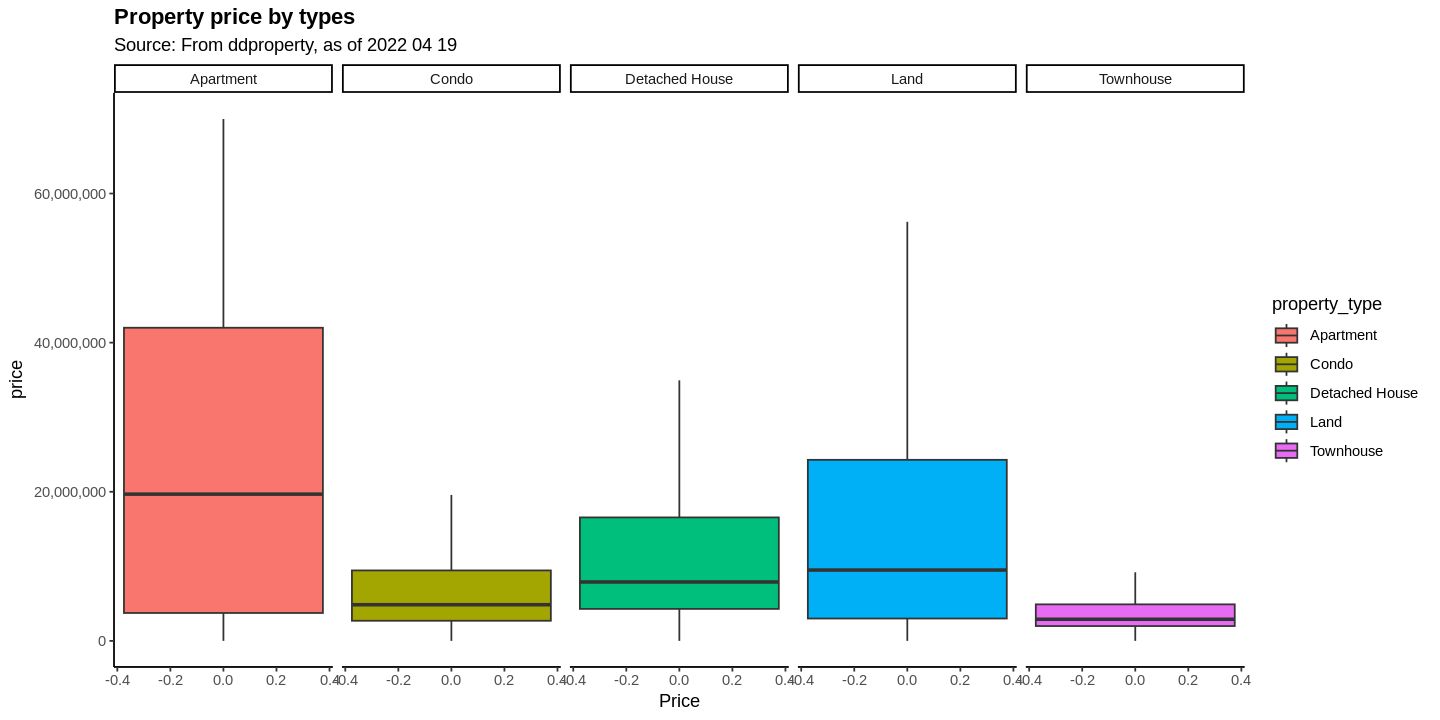

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 6, dpi = 600)

ggplot(data, mapping = aes(y = price, fill = property_type)) +
  geom_boxplot(outlier.shape = NA) +
  scale_y_continuous(limits = c(0,70000000), ##price quantile 0.95 = 67m THB
                     labels = scales::comma) +
  facet_grid(~ property_type) +

##theme and label
  theme_classic() +
  theme(plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs( x = "Price",
        title = "Property price by types",
        subtitle = "Source: From ddproperty, as of 2022 04 19 ")

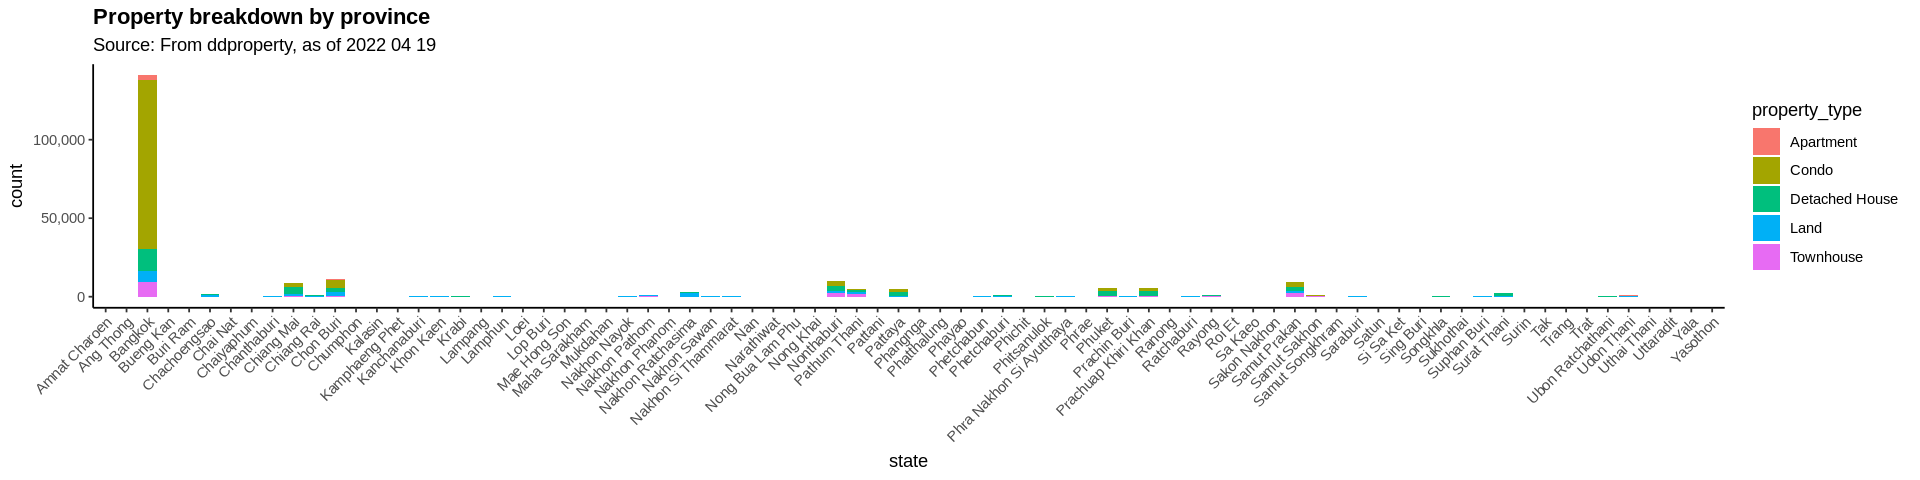

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 4, dpi = 600)

ggplot(data, mapping = aes(y = state, fill = property_type)) +
  geom_bar() +
  scale_x_continuous(labels = scales::comma) +
  coord_flip() +

##theme and label
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(face = "bold"),
        element_text(family = "Noto sans")) +
  labs( title = "Property breakdown by province",
        subtitle = "Source: From ddproperty, as of 2022 04 19 ")

Further analysis
*   Aggregated data by state
*   Property price by state

